In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
N = 200

X = np.random.rand(N,1)
Y = np.sin(2*np.pi*X) + np.random.uniform(-0.2,0.2, size=(N,1))
Z = np.sin(2*np.pi*X)

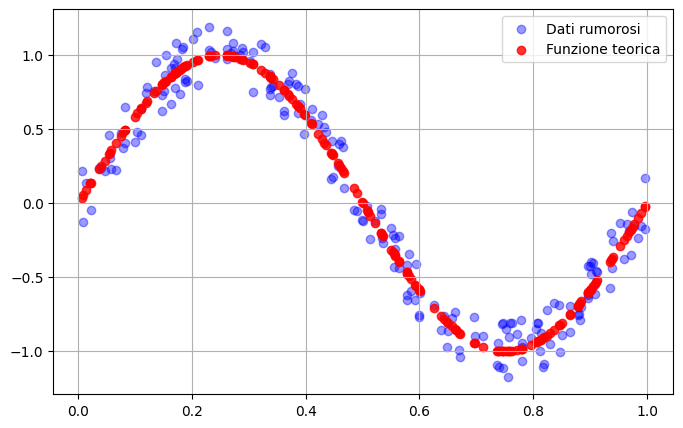

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', alpha=0.4, label='Dati rumorosi')
plt.scatter(X, Z, color='red' , alpha=0.8,label='Funzione teorica')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def pol(n, X=None):
    if X is None:
        X = np.linspace(0, 1, 100)  # default: 100 punti fra 0 e 1
    
    # Coefficienti casuali tra -0.5 e 0.5
    coef = np.random.uniform(-0.5, 0.5, size=n+1)
    p = np.polynomial.Polynomial(coef)
    Z = p(X)
    
    return Z, coef 


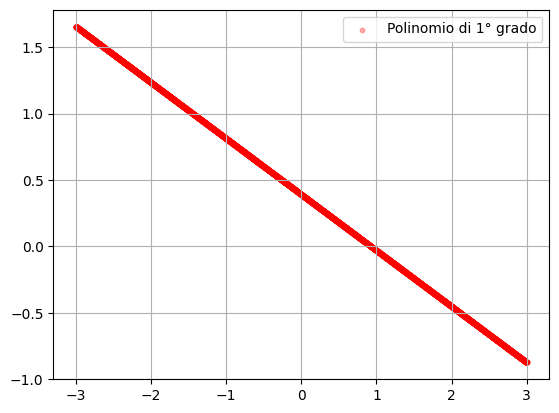

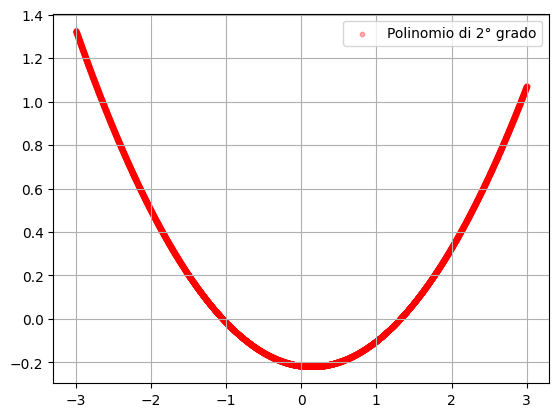

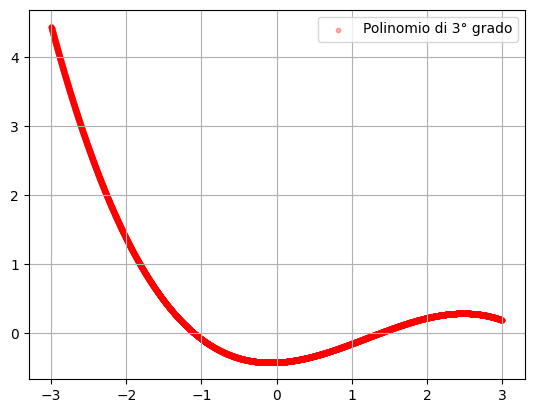

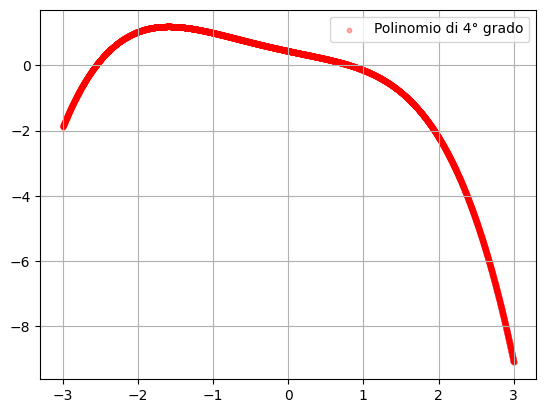

In [5]:
n = np.linspace(1,4,4)
for i in n:
    i = int(i) 
    X = np.linspace(-3,3, 10000)
    Z, _ = pol(i,X)

    plt.scatter(X, Z, s=10, color='red', alpha=0.3, label=f'Polinomio di {i}° grado')
    plt.grid(True)
    plt.legend()
    plt.show()

In [6]:
def J(omega, Y, X, N):
    p =np.polynomial.Polynomial(omega)
    elements = (Y - p(X))**2
    return np.sum(elements)/(2*N)


def grad_J(omega, Y, X, N):
    M = len(omega)
    grad = np.zeros(M)
    error = (Y - np.polynomial.Polynomial(omega)(X))
    for j in range(M):
        # derivata rispetto a omega_j
            grad[j] = np.sum(error * X**j)
            grad[j] = -grad[j] / N
    
    return grad


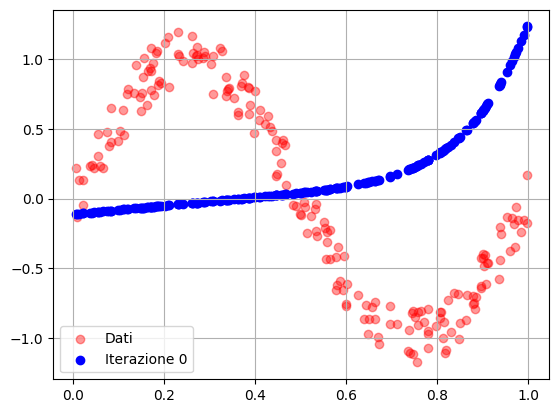

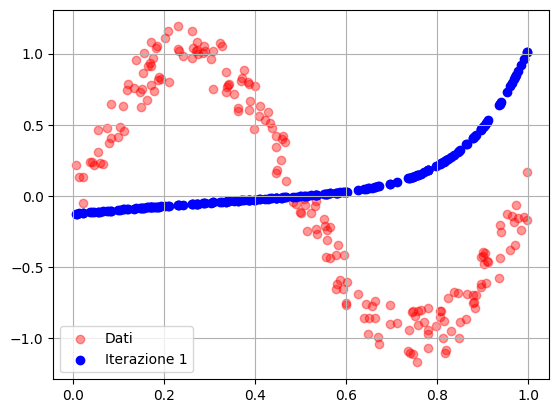

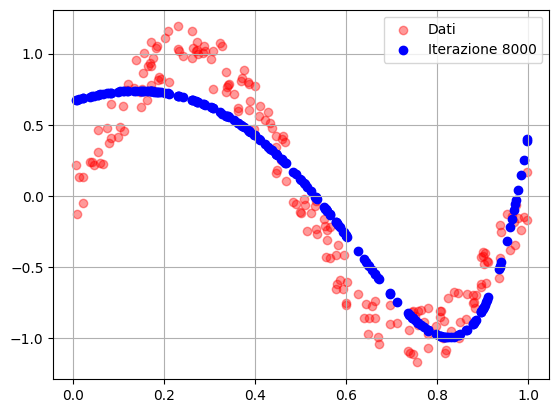

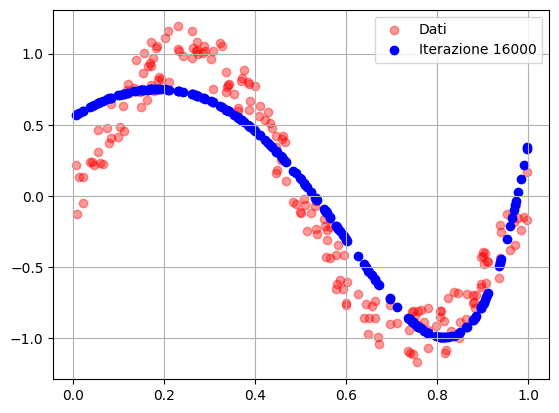

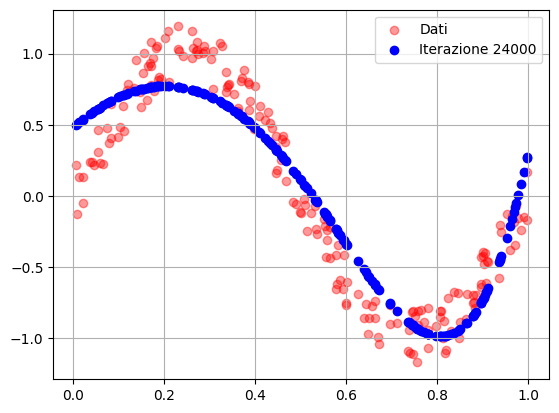

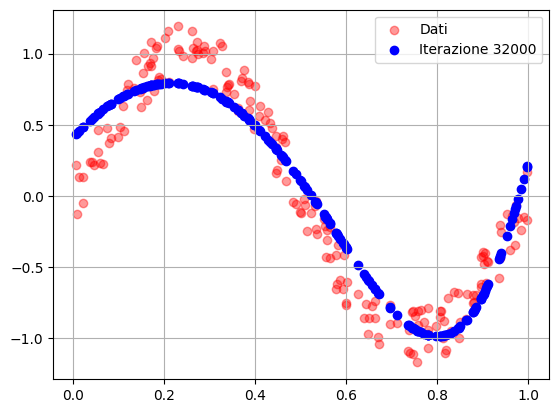

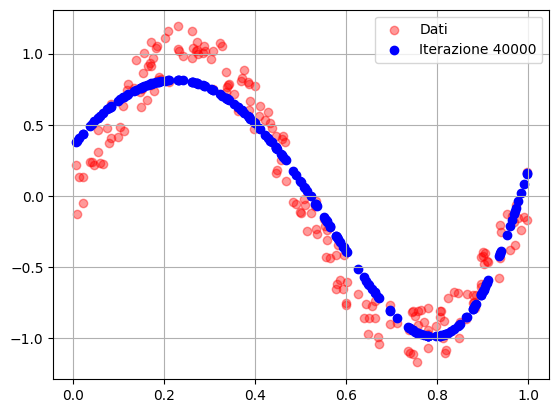

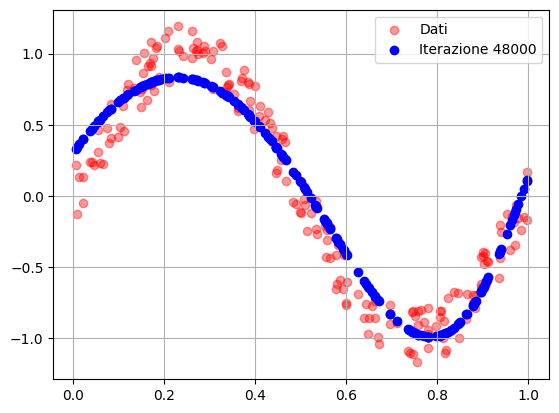

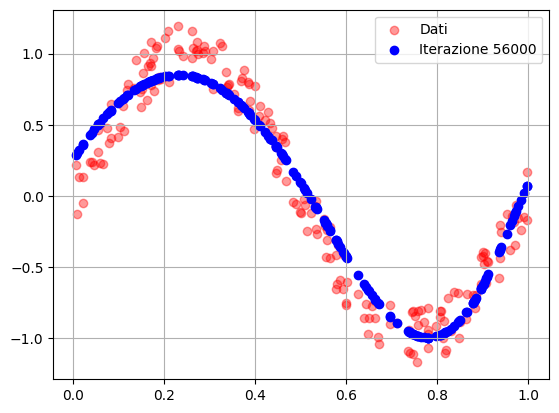

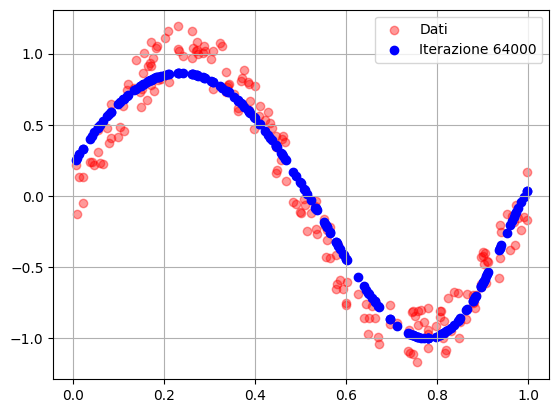

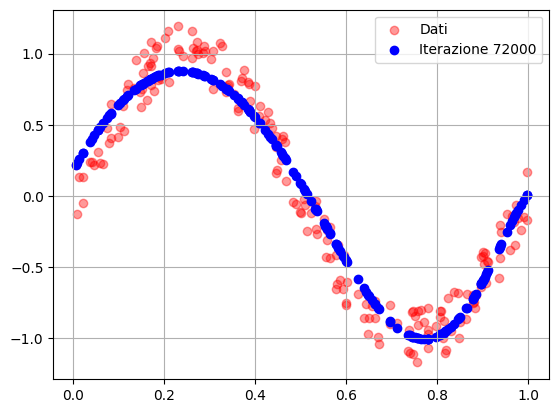

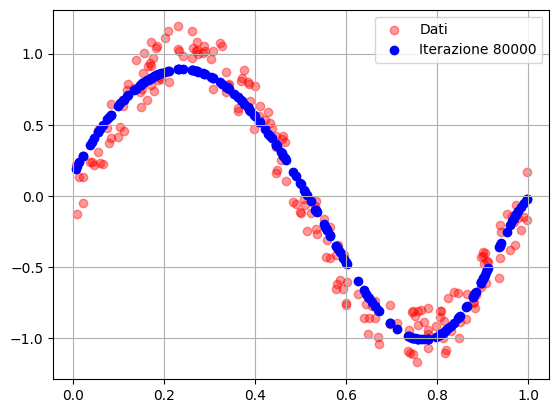

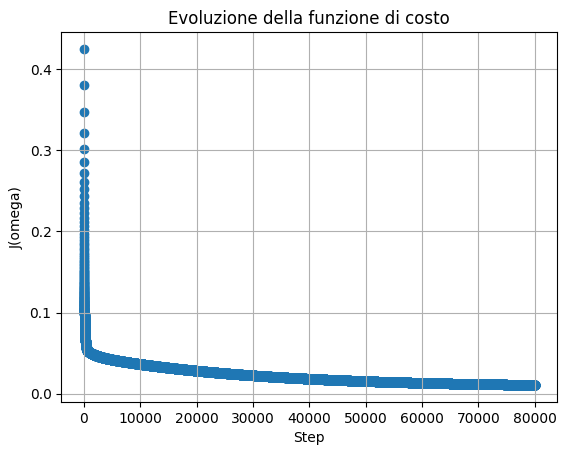

[  0.15666161   5.96239318 -11.05267563  -4.96924249   0.96401823
   5.08003212   5.17104433   3.8448739    1.33219775  -1.54063247
  -4.95921124]


In [9]:
eta=0.1
steps=80000
n=10
p, omega = pol(n,X)
J_history = []

for i in range (steps+1):
    omega = omega - eta*grad_J(omega,Y,X,N)
    cost = J(omega, Y, X, N)
    J_history.append(cost)
    #Grafico Dati - Polinomio
    if (i % 8000 == 0 or i%80000 == 1):
        plt.scatter(X, Y, color='red',alpha=0.4, label='Dati')
        plt.scatter(X, np.polynomial.Polynomial(omega)(X),color='blue', label=f'Iterazione {i}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Grafico della funzione di costo
plt.scatter(range(steps+1), J_history)
plt.xlabel('Step')
plt.ylabel('J(omega)')
plt.title('Evoluzione della funzione di costo')
plt.grid(True)
plt.show()

print(omega)


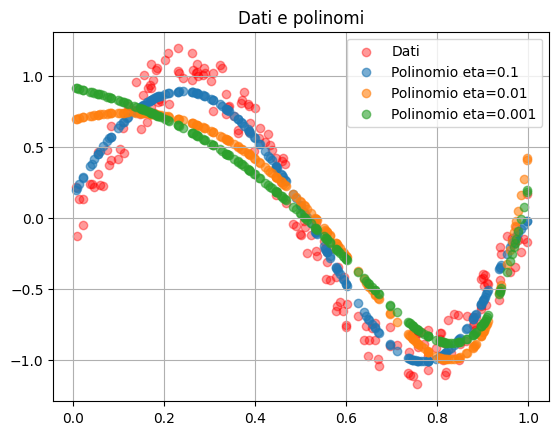

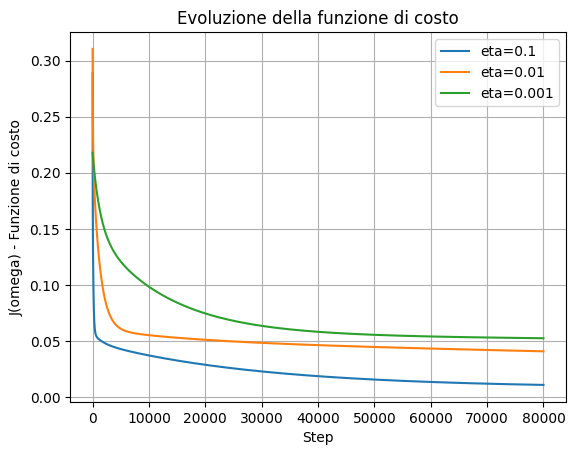

In [10]:
etas = [0.1, 0.01, 0.001]
steps = 80000
n = 10

results = {}  # per salvare (omega_finale, J_history) per ogni eta

# Calcolo una sola volta per ogni eta
for eta in etas:
    p, omega = pol(n, X)
    J_history = []
    
    for i in range(steps + 1):
        omega = omega - eta * grad_J(omega, Y, X, N)
        cost = J(omega, Y, X, N)
        J_history.append(cost)
    
    results[eta] = (omega, J_history)

#Dati e polinomi
plt.figure()
plt.scatter(X, Y, color='red', alpha=0.4, label='Dati')

for eta, (omega, _) in results.items():
    plt.scatter(X, np.polynomial.Polynomial(omega)(X), alpha=0.6, label=f'Polinomio eta={eta}')

plt.legend()
plt.title('Dati e polinomi')
plt.grid(True)
plt.show()

# Funzione di costo
fig, ax = plt.subplots()

for eta, (_, J_history) in results.items():
    ax.plot(range(steps + 1), J_history, label=f'eta={eta}')

ax.set_xlabel('Step')
ax.set_ylabel('J(omega) - Funzione di costo')
ax.set_title('Evoluzione della funzione di costo')
ax.grid(True)
ax.legend()
plt.show()


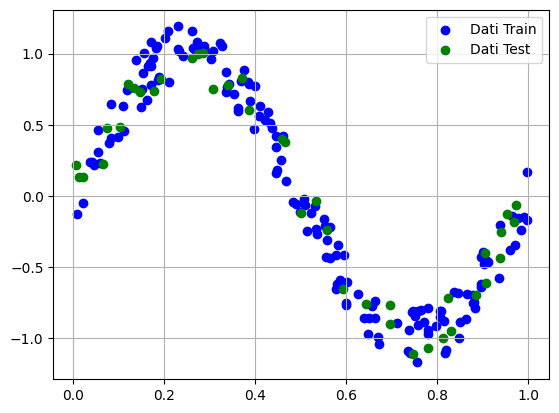

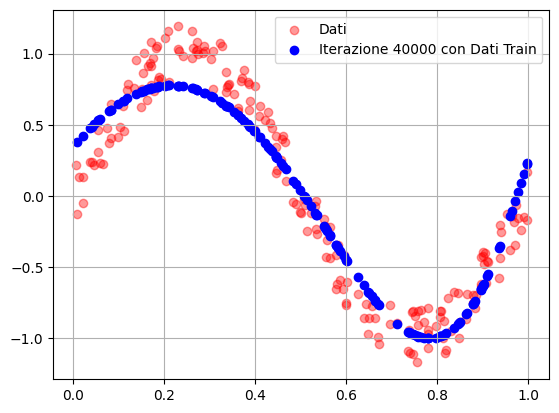

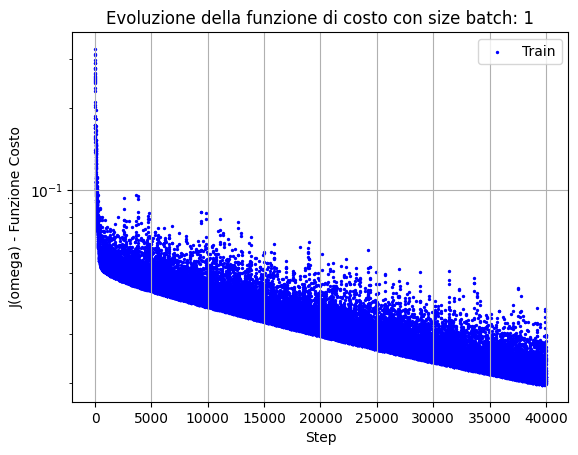

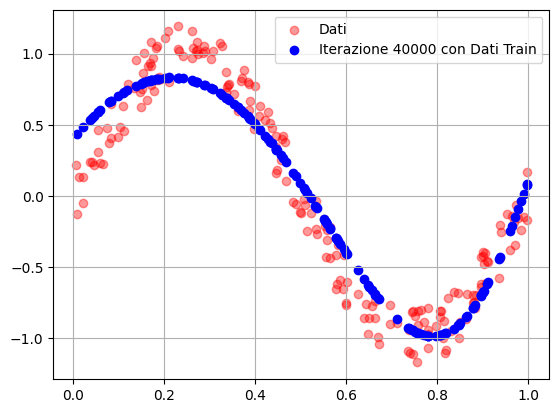

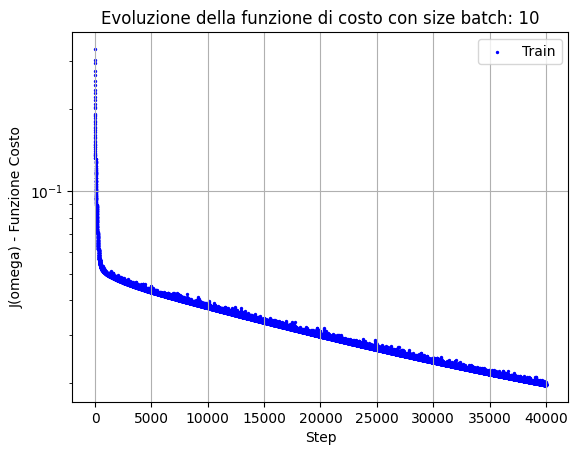

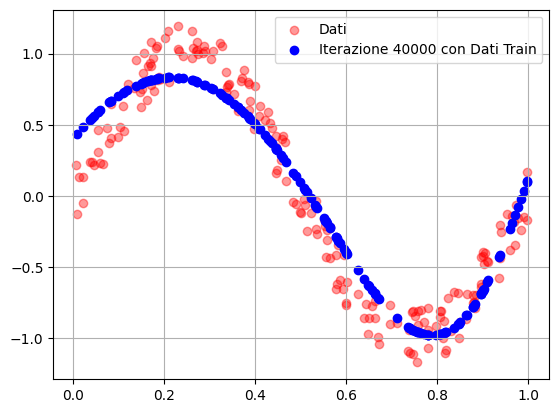

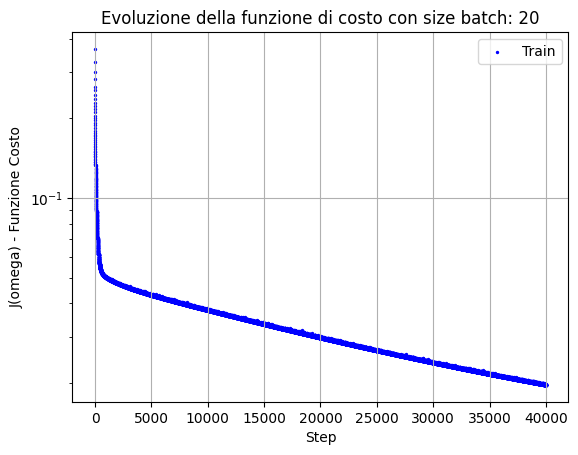

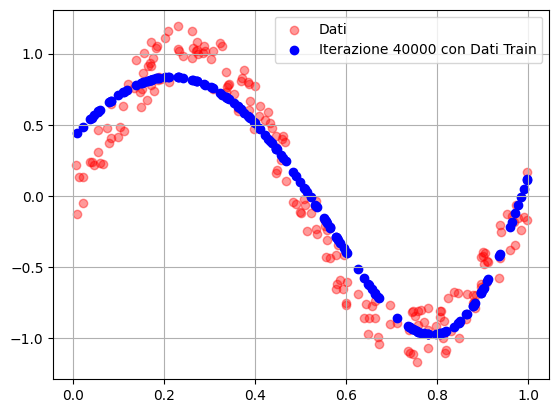

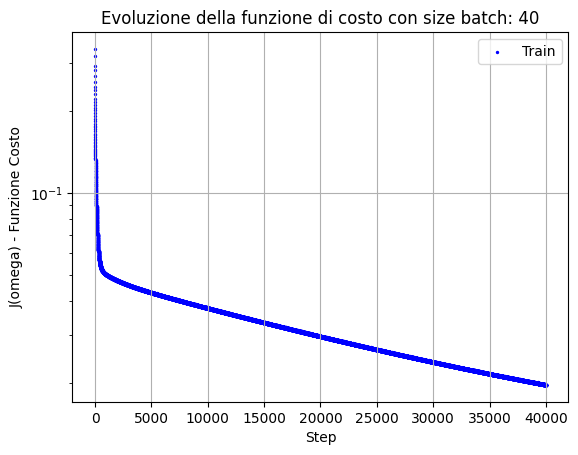

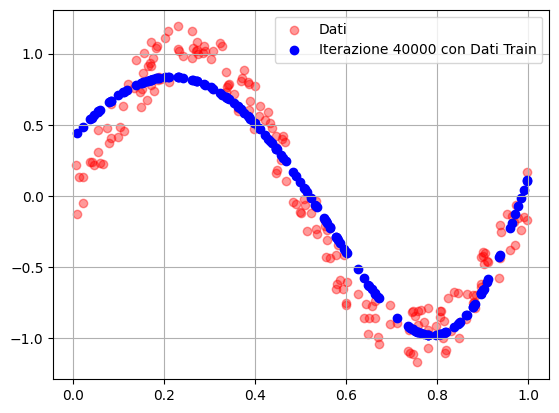

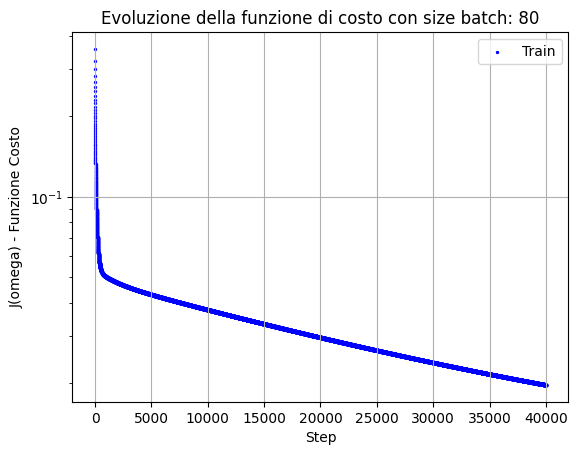

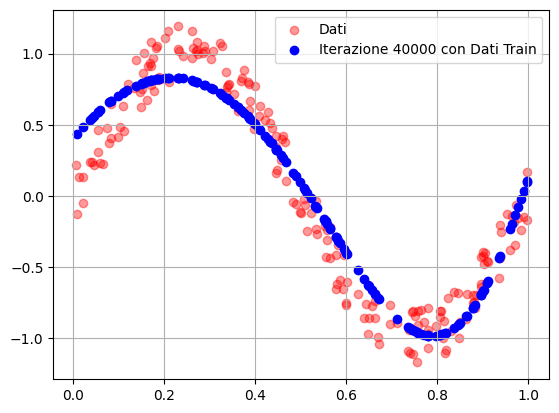

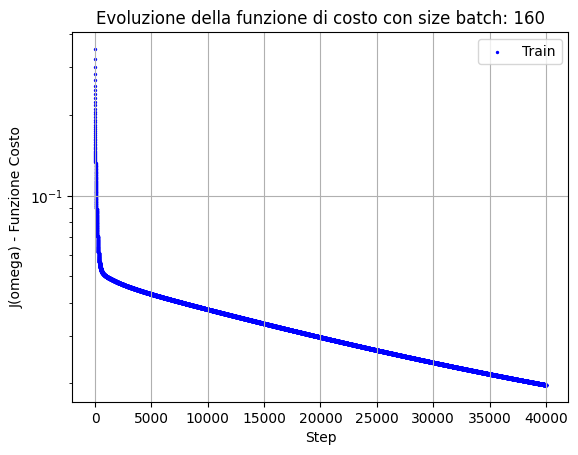

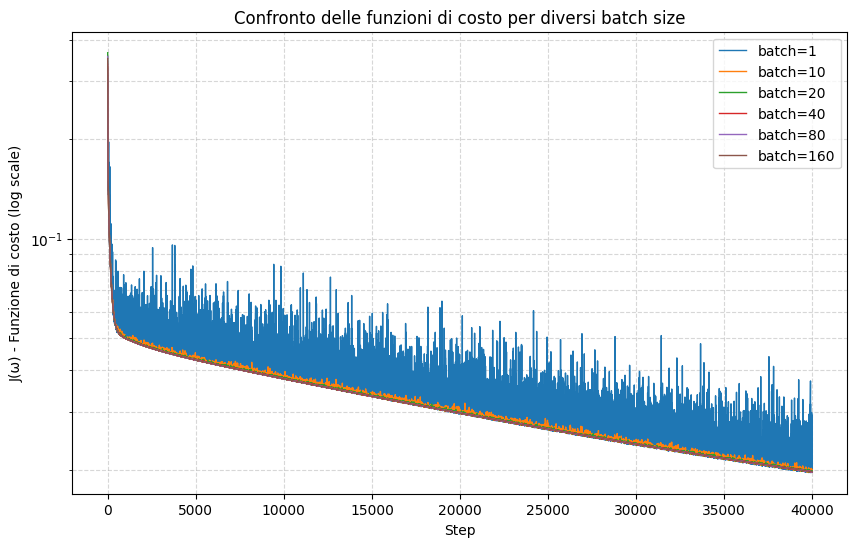

In [12]:
# Creazione batch senza ripetizione
def create_batches(X, Y, batch_size):
    N_train = len(X)
    X_batches = []
    Y_batches = []

    for i in range(0, N_train, batch_size):
        X_batches.append(X[i:i + batch_size])
        Y_batches.append(Y[i:i + batch_size])

    return X_batches, Y_batches

# Split train-test
test_ratio = 0.2
N_test = int(N * test_ratio)
N_train = N-N_test
indices = np.arange(N)
np.random.shuffle(indices)
X_train, Y_train = X[indices[N_test:]], Y[indices[N_test:]]
X_test, Y_test = X[indices[:N_test]], Y[indices[:N_test]]
#Plot Dati
plt.scatter(X_train, Y_train,color='blue', label='Dati Train')
plt.scatter(X_test, Y_test,color='green', label='Dati Test')
plt.legend()
plt.grid(True)
plt.show()

eta = 0.1
steps = 40000
n=10
p, omega0 = pol(n,X)
results = {}

batch_sizes = [1, 10, 20, 40, 80, 160] # da 180 batch a 1 batch

for batch_size in batch_sizes:
    #partire dalle stessa situazione iniziale
    J_history=[]
    omega=omega0
    num_batches = int(N_train / batch_size)

    for i in range(steps+1):
        if(i%(num_batches)==0):
            indices = np.arange(N_train)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            Y_train = Y_train[indices]
            X_batches, Y_batches = create_batches(X_train, Y_train, batch_size)
        index_batches=i%num_batches
        current_batch_size = len(X_batches[index_batches])
        omega = omega - eta * grad_J(omega,Y_batches[index_batches],X_batches[index_batches],current_batch_size)
        cost = J(omega, Y_train, X_train, N_train) #calcolato sui dati di train
        J_history.append(cost)
    
    results[batch_size] = J_history

    #Grafico Dati - Polinomio
    plt.scatter(X, Y, color='red',alpha=0.4, label='Dati')
    plt.scatter(X_train, np.polynomial.Polynomial(omega)(X_train),color='blue', label=f'Iterazione {i} con Dati Train')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Grafico delle funzioni di costo
    plt.scatter(range(steps+1), J_history,s=2, color='blue', label='Train')
    plt.yscale('log')
    plt.xlabel('Step')
    plt.ylabel('J(omega) - Funzione Costo')
    plt.title(f'Evoluzione della funzione di costo con size batch: {batch_size}')
    plt.grid(True)
    plt.legend()
    plt.show()


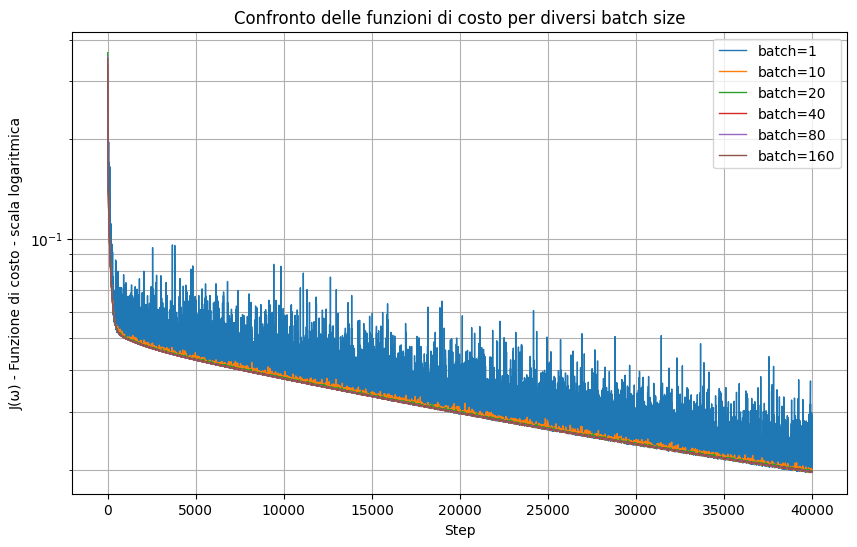

In [23]:
#Grafico delle funzioni costo in scala log
plt.figure(figsize=(10,6))

for batch_size, J_history in results.items():
    plt.plot(range(len(J_history)), J_history, label=f'batch={batch_size}', linewidth=1)

plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('J(ω) - Funzione di costo - scala logaritmica')
plt.title('Confronto delle funzioni di costo per diversi batch size')
plt.grid(True, which='both')
plt.legend()
plt.show()

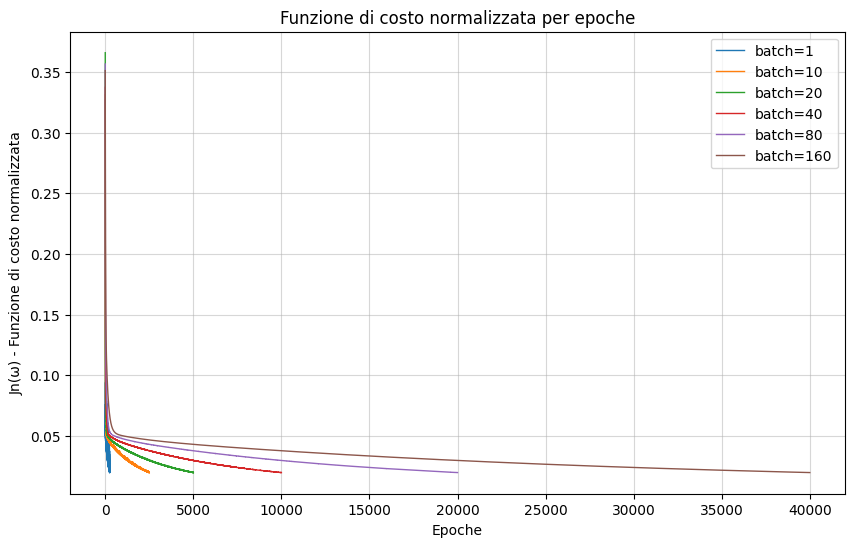

In [19]:
#Grafico: Normalizzazione per epoche
plt.figure(figsize=(10,6))
for batch_size, J_history in results.items():
    # ogni epoca = passaggio completo sui N_train
    num_batches = int(N_train / batch_size)
    #rinormalizzo il vettore delle iterazione per il numero di batches 
    epochs = np.arange(len(J_history)) / num_batches 
    plt.plot(epochs, J_history, label=f'batch={batch_size}', linewidth=1)
plt.xlabel('Epoche')
plt.ylabel('J(ω) - Funzione di costo')
plt.title('Funzione di costo normalizzata per epoche')
plt.grid(True, which="both", alpha=0.5)
plt.legend()
plt.show()


In [26]:
eta = 0.1
steps = 80000
n = 10
p, omega = pol(n, X)
J_train_history = []
J_test_history = []

for i in range(steps + 1):
    omega = omega - eta * grad_J(omega, Y_train, X_train, N_train) 
    
    # Calcola errore su entrambi
    cost_train = J(omega, Y_train, X_train, N_train)
    cost_test = J(omega, Y_test, X_test, N_test)
    
    J_train_history.append(cost_train)
    J_test_history.append(cost_test)

# Evoluzione del costo train vs test
plt.figure(figsize=(10, 6))
plt.plot(range(steps+1), J_train_history, label='Train Error', linewidth=2)
plt.plot(range(steps+1), J_test_history, label='Test Error', linewidth=2, linestyle='--')
plt.xlabel('Step')
plt.ylabel('J(ω)')
plt.title(f'Train vs Test Error - Polinomio grado {n}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Polinomio finale su train e test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', alpha=0.4, label='Dati Train')
plt.scatter(X_train, np.polynomial.Polynomial(omega)(X_train), 
            color='red', alpha=0.6, s=20, label='Predizioni del Modello Allenato')
plt.legend()
plt.title('Risultato Dati di Train')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test, Y_test, color='green', alpha=0.4, label='Dati Test')
plt.scatter(X_test, np.polynomial.Polynomial(omega)(X_test), 
            color='red', alpha=0.6, s=20, label='Predizioni del Modello Allenato')
plt.legend()
plt.title('Generalizzazione sui Dati di Test')
plt.grid(True)

plt.tight_layout()
plt.show()